### EE 421/521 Image Processing - Spring 2021-22

## Project 3 -  Two-Dimensional Filtering

#### Submission deadline: 10 March 2022

In this project, you will implement the following:

1. A 2D convolution
2. High-frequency boost filter
3. Horizontal edge detection filter
4. 135-degree edge detection filter
5. Unsharp-masking filter (long approach)
6. Unsharp-masking filter (direct approach)

**Note: This project will be graded for both EE 421 (HW2) and EE 521 (HW2) students.**

*Copyright (c) 2020-2022 by Arif Tanju Erdem*



```
# Bu, kod olarak biçimlendirilmiştir
```

************************************
Emirhan Benderli
************************************

In [ ]:
# STEP 0 Import the necessary packages

# reading/writing image files
from skimage import io
from skimage import color

# displaying images and plots
import matplotlib.pyplot as plt

# array operations
import numpy as np

# signal processing operations
from scipy import signal
from scipy.linalg import circulant

In [ ]:
# function to round image data to nearest integer, truncate to range [0, 255], set data type to uint8

def my_imgTruncate(img):

    img = np.round(img, 0)
    img = np.minimum(img, 255)
    img = np.maximum(img, 0)
    img = img.astype('uint8')

    return img

In [ ]:
# my function to convert to lumincance, round to nearest integer,
# truncate to range [0, 255], and then set data

def my_imgLuminance(imgRGB):

    # make sure it is a color image
    dim_img = imgRGB.shape[2]
    assert dim_img >= 3

    # get the luminance data
    if dim_img == 3:
        imgLum = color.rgb2gray(imgRGB)
    else:
        # ignore the alpha channel
        imgLum = color.rgb2gray(imgRGB[:,:,0:3])

    imgLum = np.round(imgLum * 255, 0)
    imgLum = np.minimum(imgLum, 255)
    imgLum = np.maximum(imgLum, 0)
    imgLum = imgLum.astype('uint8')

    return imgLum

# end of function

In [ ]:
# ===============================
# (1.a) Implement 2D convolution
# ===============================

# ADD YOUR CODE HERE

# calculate 2-D convolution

def my_filter2D(X, H):

    # X: 2D input image
    # H: 2D filter kernel

    # make sure both X and H are 2-D
    assert( X.ndim == 2)
    assert( H.ndim == 2)

    # get the horizontal and vertical size of X and H
    X_size_x = X.shape[1]
    X_size_y = X.shape[0]
    H_size_x = H.shape[1]
    H_size_y = H.shape[0]

    # calculate the horizontal and vertical size of Y (assume "full" convolution)
    Y_size_x = X_size_x + H_size_x - 1
    Y_size_y = X_size_y + H_size_y - 1

    # create an empty output array
    Y = np.zeros((Y_size_y,Y_size_x))

    # (i) go over output locations
    for row_y in range(Y_size_y):
        for col_y in range(Y_size_x):
        # (ii) go over input locations
            for row_x in range(X_size_y):
                for col_x in range(X_size_x):
            # (iii) make sure the kernel is within bounds
                    if (row_y-row_x >= H_size_y or col_y-col_x >= H_size_x ): continue
                    elif( row_y-row_x < 0 or col_y-col_x <0): break
            # (iv) calculate the convolution sum
                    Y[row_y,col_y]+= X[row_x,col_x] * H[row_y-row_x,col_y-col_x]


    return Y

# end of function


In [ ]:
# ===============================
# (1.b) Test your 2-D convolution function
# ===============================

# a sample 2-D input
X = np.array([[2, 1, 2, 3, 0],
              [1, 3, 2, 1, 1],
              [2, 3, 0, 1, 2],
              [0, 1, 3, 2, 1]])

# a sample 2-D filter
H = np.array([[2, 4, -2],
              [1, 2, -1]])

# call your function to calculate 2D convolution
Y_my = my_filter2D(X, H)

# print your output
print("My convolution: \n", Y_my)

# use SciPy function to calculate 2D convolution
Y_sp = signal.convolve2d(X, H, mode='full', boundary='fill', fillvalue=0)

# print SciPy output and compare it with yours
print("\nSciPy convolution: \n", Y_sp)

# print the error evaluated as sum-squared-difference
print("\nError: ", ((Y_my - Y_sp)*(Y_my - Y_sp)).sum())


My convolution: 
 [[ 4. 10.  4. 12.  8. -6.  0.]
 [ 4. 15. 16. 10.  6. -1. -2.]
 [ 5. 19. 15. -2.  9.  7. -5.]
 [ 2.  9. 14. 12.  8.  3. -4.]
 [ 0.  1.  5.  7.  2.  0. -1.]]

SciPy convolution: 
 [[ 4 10  4 12  8 -6  0]
 [ 4 15 16 10  6 -1 -2]
 [ 5 19 15 -2  9  7 -5]
 [ 2  9 14 12  8  3 -4]
 [ 0  1  5  7  2  0 -1]]

Error:  0.0


Mounted at /content/drive
Image width is 512 and image height is 512.
Number of color bands is 3.
Image data type is uint8.



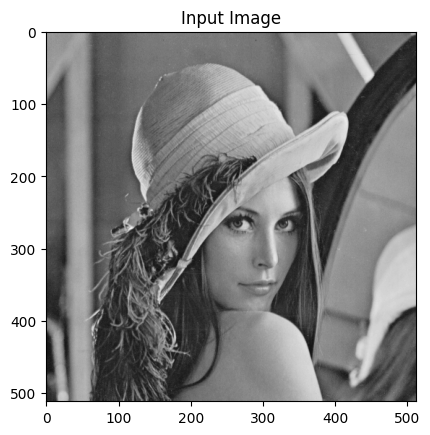

In [ ]:
# STEP 2 Pick an image for filtering
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

# set image folder
image_folder = r'/content/drive/MyDrive/Colab Notebooks/421_Images'

# read input image
image_file = r'/lena.png'
image_path = image_folder + image_file
imgRGB = io.imread(image_path)

height = imgRGB.shape[0]
width = imgRGB.shape[1]
bands = imgRGB.shape[2]
datatype = imgRGB.dtype

print("Image width is {} and image height is {}.".format(width, height))
print("Number of color bands is {}.".format(bands))
print("Image data type is {}.\n".format(datatype))

# calculate the luminance image
img_input = my_imgLuminance(imgRGB)

# display luminance image
plt.imshow(img_input, cmap='gray', vmin=0, vmax=255)
plt.title('Input Image')
#plt.xticks([]), plt.yticks([])
plt.show()

Text(0.5, 1.0, 'high freq boost filter')

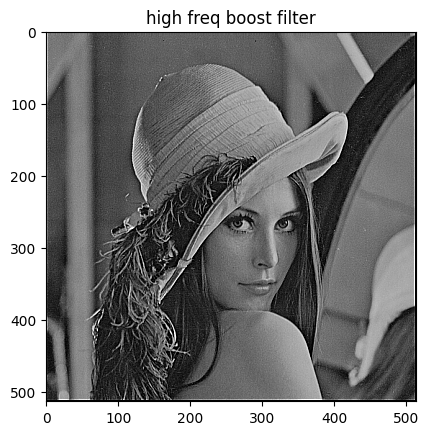

In [ ]:
# =====================================================
# (2.1) Define a high-frequency boost filter and apply it on input image
# =====================================================

# ADD YOUR CODE HERE

# (i) define a high-frequency boost filter
hfbf = np.multiply([[-1,-1,-1],[-1,10,-1],[-1,-1,-1]], 0.4)
# (ii) apply the high-frequency boost filter on the input image
# use the signal.convolve2d() function for filtering
high_freq_img = signal.convolve2d(img_input,hfbf ,mode='full' ,boundary='fill', fillvalue=0)
# (iii) display the output image
plt.imshow(high_freq_img, cmap='gray', vmin=0, vmax=255)
plt.title("high freq boost filter")


Text(0.5, 1.0, 'horizontal edge detection filter')

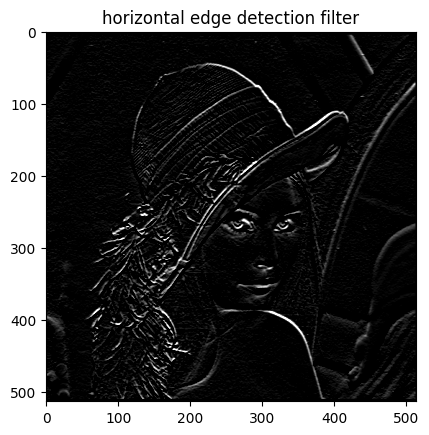

In [ ]:
# ========================================================
# (2.2) Define a horizontal edge detection filter and apply it on input image
# ========================================================

# ADD YOUR CODE HERE
hedf = [[1,2,1],[0,0,0],[-1,-2,-1]]

# (ii) apply the horizontal edge detection filter on the input image
# use the signal.convolve2d() function for filtering
hori_img = signal.convolve2d(img_input, hedf, mode='full', boundary='fill', fillvalue=0)

# (iii) display the output image
plt.imshow(hori_img, cmap='gray',vmin=0, vmax=255)
plt.title("horizontal edge detection filter")


Text(0.5, 1.0, '135 degree edge detection filter')

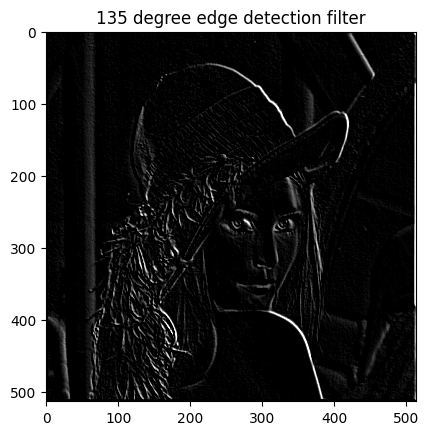

In [ ]:
# ========================================================
# (2.3) Apply a 135-degree edge detection filter on input image
# ========================================================

# ADD YOUR CODE HERE

# (i) define a 135-degree edge detection filter
degH = [[ 0, 1, 1],[-1, 0, 1],[-1,-1, 0]]
# (ii) apply the 135-degree edge detection filter on the input image
# use the signal.convolve2d() function for filtering
deg_img = signal.convolve2d(img_input, degH, mode='full', boundary='fill', fillvalue=0)

# (iii) display the output image
plt.imshow(deg_img, cmap='gray', vmin=0, vmax=255)
plt.title("135 degree edge detection filter")

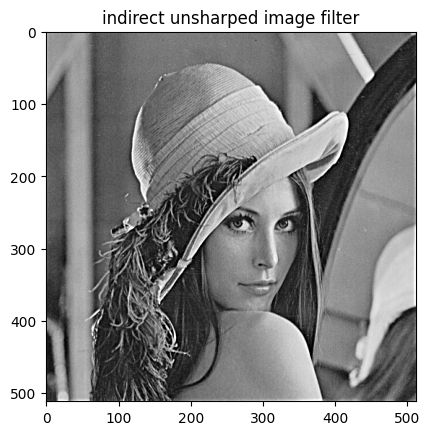

In [ ]:
# ==========================================================================
# (3.1) Implement unsharp masking (long approach)
# ==========================================================================

# ADD YOUR CODE HERE

# (i) define a Gaussian filter
# h
def gaussianFilter(M):
    sigma= 0.425*M
    size= np.round(2.55 * M, 0)
    size= size.astype(int)
    if (size%2==0):
        size -=1
    my_filter = signal.windows.gaussian(size, sigma, sym=True)
    return my_filter

M= 5
h= gaussianFilter(M)
h= h/np.sum(h)
h= np.outer(h,h)

# (ii) apply the Gaussian filter to obtain a blurred image
# use the signal.convolve2d() function for filtering
# x * h
gauss_filter_img= signal.convolve2d(img_input, h, mode='same', boundary='fill', fillvalue=0)

# (iii) calculate the sharpening image
# x - x * h
sharpening_img= img_input-gauss_filter_img
# (iv) calculate the output image using the blurred image and sharpening image
# x + x - x * h
unsharp_img= img_input + sharpening_img
# (v) display the output image
plt.imshow(unsharp_img, cmap='gray', vmin=0, vmax=255)
plt.title("indirect unsharped image filter")
plt.show()

Text(0.5, 1.0, 'direct unsharped image filter')

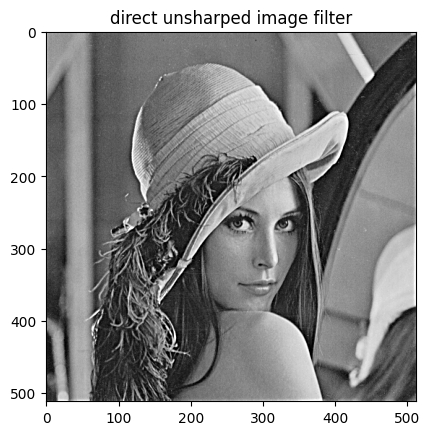

In [ ]:
# ==========================================================================
# (3.2) Implement unsharp masking (direct approach)
# ==========================================================================

# ADD YOUR CODE HERE

# (i) define convolution mask
# x + x - x * h = x * I + x * I - x * h = x * (I + I - h) = x * D
#
# 3 x 3 identity filter I = [[0, 0, 0],
#                            [0, 1, 0]]
#                            [0, 0, 0]]
#
# Direct unsharp masking filter: D = 2I - h
size= h.shape[0]
I= np.zeros((size,size))
I[int((size-1)/2), int((size-1)/2)]= 1
conv_mask= (2*I)-h

# (ii) calculate the output image
# use the signal.convolve2d() function for filtering
unsharp_img2 = signal.convolve2d(img_input, conv_mask, mode='same', boundary='fill', fillvalue=0)

# (iii) display the output image
plt.imshow(unsharp_img2, cmap='gray', vmin=0, vmax=255)
plt.title("direct unsharped image filter")


*STEP 4 Comments on the results*

*ADD YOUR COMMENTS HERE*

(a) Comment on the filtering results in 2.1, 2.2 and 2.3. Do the results look as expected?
2.1 is more detailed(sharper). 2.2 shows horizantal boundary with brighter color while 2.3 showing 135 degree boundary with brighter colors.

(b) Comment on the filtering results of 3.1 and 3.2. Do they look the same and appear as enhanced?
They are looking sharper and the same, because both techniques are basicly do the same thing. Difference between them is indirect approach being longer to apply.

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [54]:
!jupyter nbconvert --to pdf '/content/drive/My Drive/Colab Notebooks/Prj03_Filtering.ipynb '

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/Prj03_Filtering.ipynb  to pdf
[NbConvertApp] Support files will be in Prj03_Filtering_files/
[NbConvertApp] Making directory ./Prj03_Filtering_files
[NbConvertApp] Making directory ./Prj03_Filtering_files
[NbConvertApp] Making directory ./Prj03_Filtering_files
[NbConvertApp] Making directory ./Prj03_Filtering_files
[NbConvertApp] Making directory ./Prj03_Filtering_files
[NbConvertApp] Making directory ./Prj03_Filtering_files
[NbConvertApp] Writing 58335 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 894720 bytes to /content/drive/My Drive/Colab Notebooks/Prj03_Filtering.pdf
